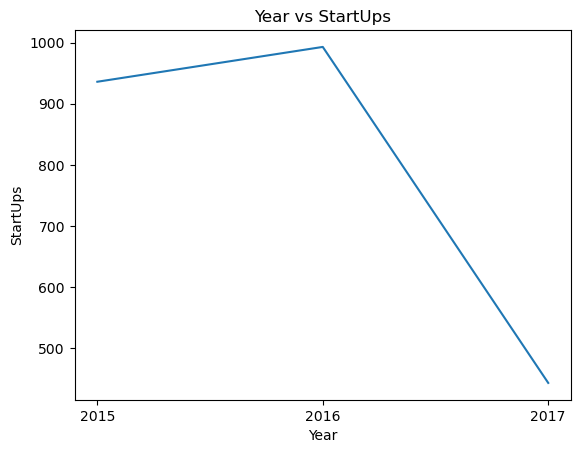

2015 936
2016 993
2017 443


In [6]:
# fundings done in each year
import csv
import matplotlib.pyplot as plt
import collections
with open('startup_funding.csv', encoding="utf8") as file_obj:
    file_data=csv.DictReader(file_obj,skipinitialspace=True)
    dic={}
    for r in file_data:
        y = r['Date'][-4:]
        if y in dic:
            dic[y]+=1
        else:
            dic[y]=1
    
    dict1 = collections.OrderedDict(sorted(dic.items())) 
    plt.plot(list(dict1.keys()),list(dict1.values()))
    plt.xlabel("Year")
    plt.ylabel("StartUps")
    plt.title('Year vs StartUps')
    plt.show()
    
    for i in dict1.keys():
        print(i,end=" ")
        print(dict1[i])

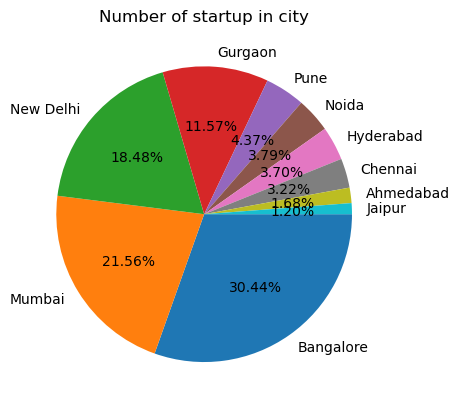

Bangalore 634
Mumbai 449
New Delhi 385
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [11]:
#10 Indian cities which have most number of startups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["CityLocation"],inplace=True)

def scity(city):
    return city.split('/')[0].strip()   #to select single city from multiple cities

df["CityLocation"]=df["CityLocation"].apply(scity)
df[df["CityLocation"]=='banglore']="Banglore"   #changing values
df[df["CityLocation"]=='delhi']="New Delhi"

city=df["CityLocation"]
city=city.value_counts()[:10]    #selecting top10
c_name=city.index
c_v=city.values

plt.pie(c_v,labels=c_name,autopct='%.2f%%',counterclock=False)
plt.title('Number of startup in city')
plt.show()

for i in range(c_name.shape[0]):
    print(c_name[i],c_v[i])

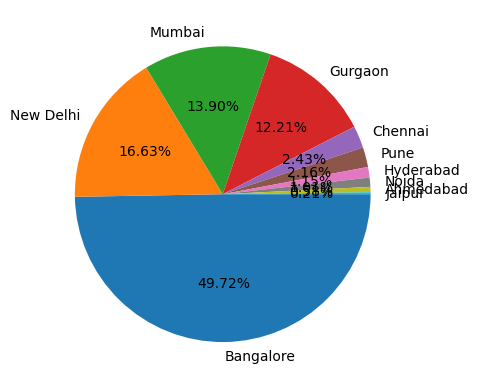

Bangalore 49.72
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [16]:
#top 10 Indian cities with most amount of fundings received
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["CityLocation"],inplace=True)

def scity(city):
    return city.split('/')[0].strip()

df["CityLocation"]=df["CityLocation"].apply(scity)
df[df["CityLocation"]=='banglore']="Banglore"
df[df["CityLocation"]=='delhi']="New Delhi"

df['AmountInUSD']=df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))  #replacing ',' in string
df=df.groupby('CityLocation')["AmountInUSD"].sum()     #grouping cities by invested amount
df=df.sort_values(ascending=False)[:10]                
city=df.index
val=df.values

plt.pie(val,labels=city,autopct='%.2f%%',counterclock=False)
plt.show()

perc=np.true_divide(val,val.sum())*100              #saving all values in perc
for r in range(len(city)):
    print(city[r],format(perc[r],'0.2f'))

In [17]:
import csv
import matplotlib.pyplot as plt
import collections
with open('startup_funding.csv', encoding="utf8") as file_obj:
    file_data=csv.DictReader(file_obj,skipinitialspace=True)
    dic={}
    for r in file_data:
        y = r['InvestmentType']
        if y in dic:
            dic[y]+=1
        else:
            dic[y]=1
    
    print(dic)

{'Private Equity': 1066, 'Seed Funding': 1271, 'Debt Funding': 1, '': 1, 'SeedFunding': 30, 'PrivateEquity': 1, 'Crowd funding': 1, 'Crowd Funding': 1}


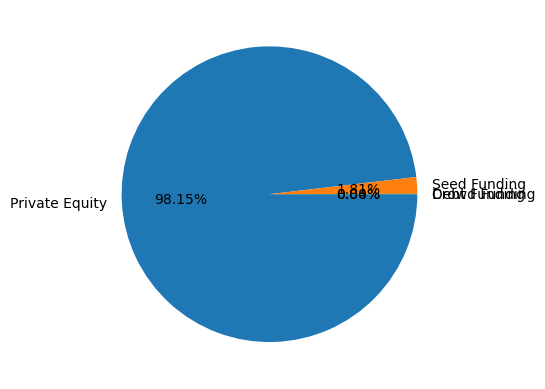

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [18]:
#amount funded for each investment type.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

df['AmountInUSD']=df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))  #replacing ',' in string
df=df.groupby('InvestmentType')["AmountInUSD"].sum()     #grouping cities by invested amount
df=df.sort_values(ascending=False)[:10]                
city=df.index
val=df.values

plt.pie(val,labels=city,autopct='%.2f%%',counterclock=False)
plt.show()

perc=np.true_divide(val,val.sum())*100              #saving all values in perc
for r in range(len(city)):
    print(city[r],format(perc[r],'0.2f'))

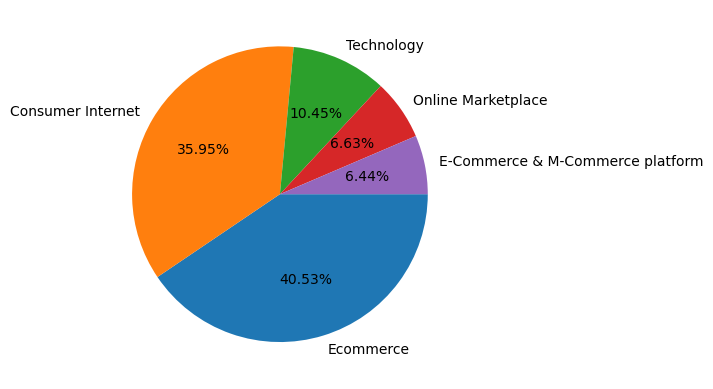

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [22]:
#Top 5 industries and percentage of the total amount funded to that industry.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace = True)

df['AmountInUSD']=df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))  #replacing ',' in string
df=df.groupby('IndustryVertical')["AmountInUSD"].sum()     #grouping cities by invested amount
df=df.sort_values(ascending=False)[:5]                
city=df.index
val=df.values

plt.pie(val,labels=city,autopct='%.2f%%',counterclock=False)
plt.show()

perc=np.true_divide(val,val.sum())*100              #saving all values in perc
for r in range(len(city)):
    print(city[r],format(perc[r],'0.2f'))

In [29]:
#5 startups with most amount of total funding.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

df['AmountInUSD']=df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))  #replacing ',' in string
df=df.groupby('StartupName')["AmountInUSD"].sum()     #grouping cities by invested amount
df=df.sort_values(ascending=False)[:5]                
startup = df.index
for i in range(5):
    print(startup[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [31]:
#5 startups which got fundings maximum number of times.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

tf=df['StartupName'].value_counts()[:5]
sName=tf.index
val=tf.values
for i in range(5):
    print(sName[i],val[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


In [38]:
import pandas as pd
import numpy as np
import collections

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.InvestorsName.fillna("",inplace = True)
investors = df.InvestorsName

investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())
dct = {}
for i in investors_name:
    dct[i] = dct.get(i,0) + 1
for i in dct:
    print(i, dct[i])

Kae Capital 22
Triton Investment Advisors 1
Kashyap Deorah 3
Anand Sankeshwar 2
Deepak Jain 1
Sadashiva NT 1
Arjun Mehta 1
Satish Kaul 1
Anindya Ghose 1
Kunal Shah 17
LetsVenture 17
Anupam Mittal 18
Hetal Sonpal 1
Narottam Thudi 1
Shireesh Palle 1
Reliance Corporate Advisory Services Ltd 1
Infuse Ventures 8
JLL 2
Asset Management (Asia) Ltd 1
Digital Garage Inc 1
Kalaari Capital 44
Nexus India Capital Advisors 1
International Finance Corporation 2
Rocketship 2
Accel Partners 53
Jungle Ventures 13
Shailesh Rao 1
Venture Highway 3
BCCL 1
Blume Ventures 39
Contrarian Capital India Partners 1
Emergent Ventures India 1
Pallav Nadhani 4
Ashish Gupta 6
Sharad Sharma 4
Sirion Labs 1
India Quotient 21
Shunwei Capital 3
Sreeram Iyer 1
Suvo Sarkar 1
Anita Gupta 1
Likemind Ventures 1
Mitsui & Co. 2
Dunamis Ventures Pte Ltd 1
Venture Catalysts 7
Sourav Ganguly 1
Ankit Aditya 1
Moksh Sports Ventures 1
Fireside Ventures 5
Apurva Salarpuria 1
Sidharth Pansari 2
Sprout Capital 1
SBI-FMO Fund 1
Bessemer